# Diabetes Prediction <=> Data Preprocessing

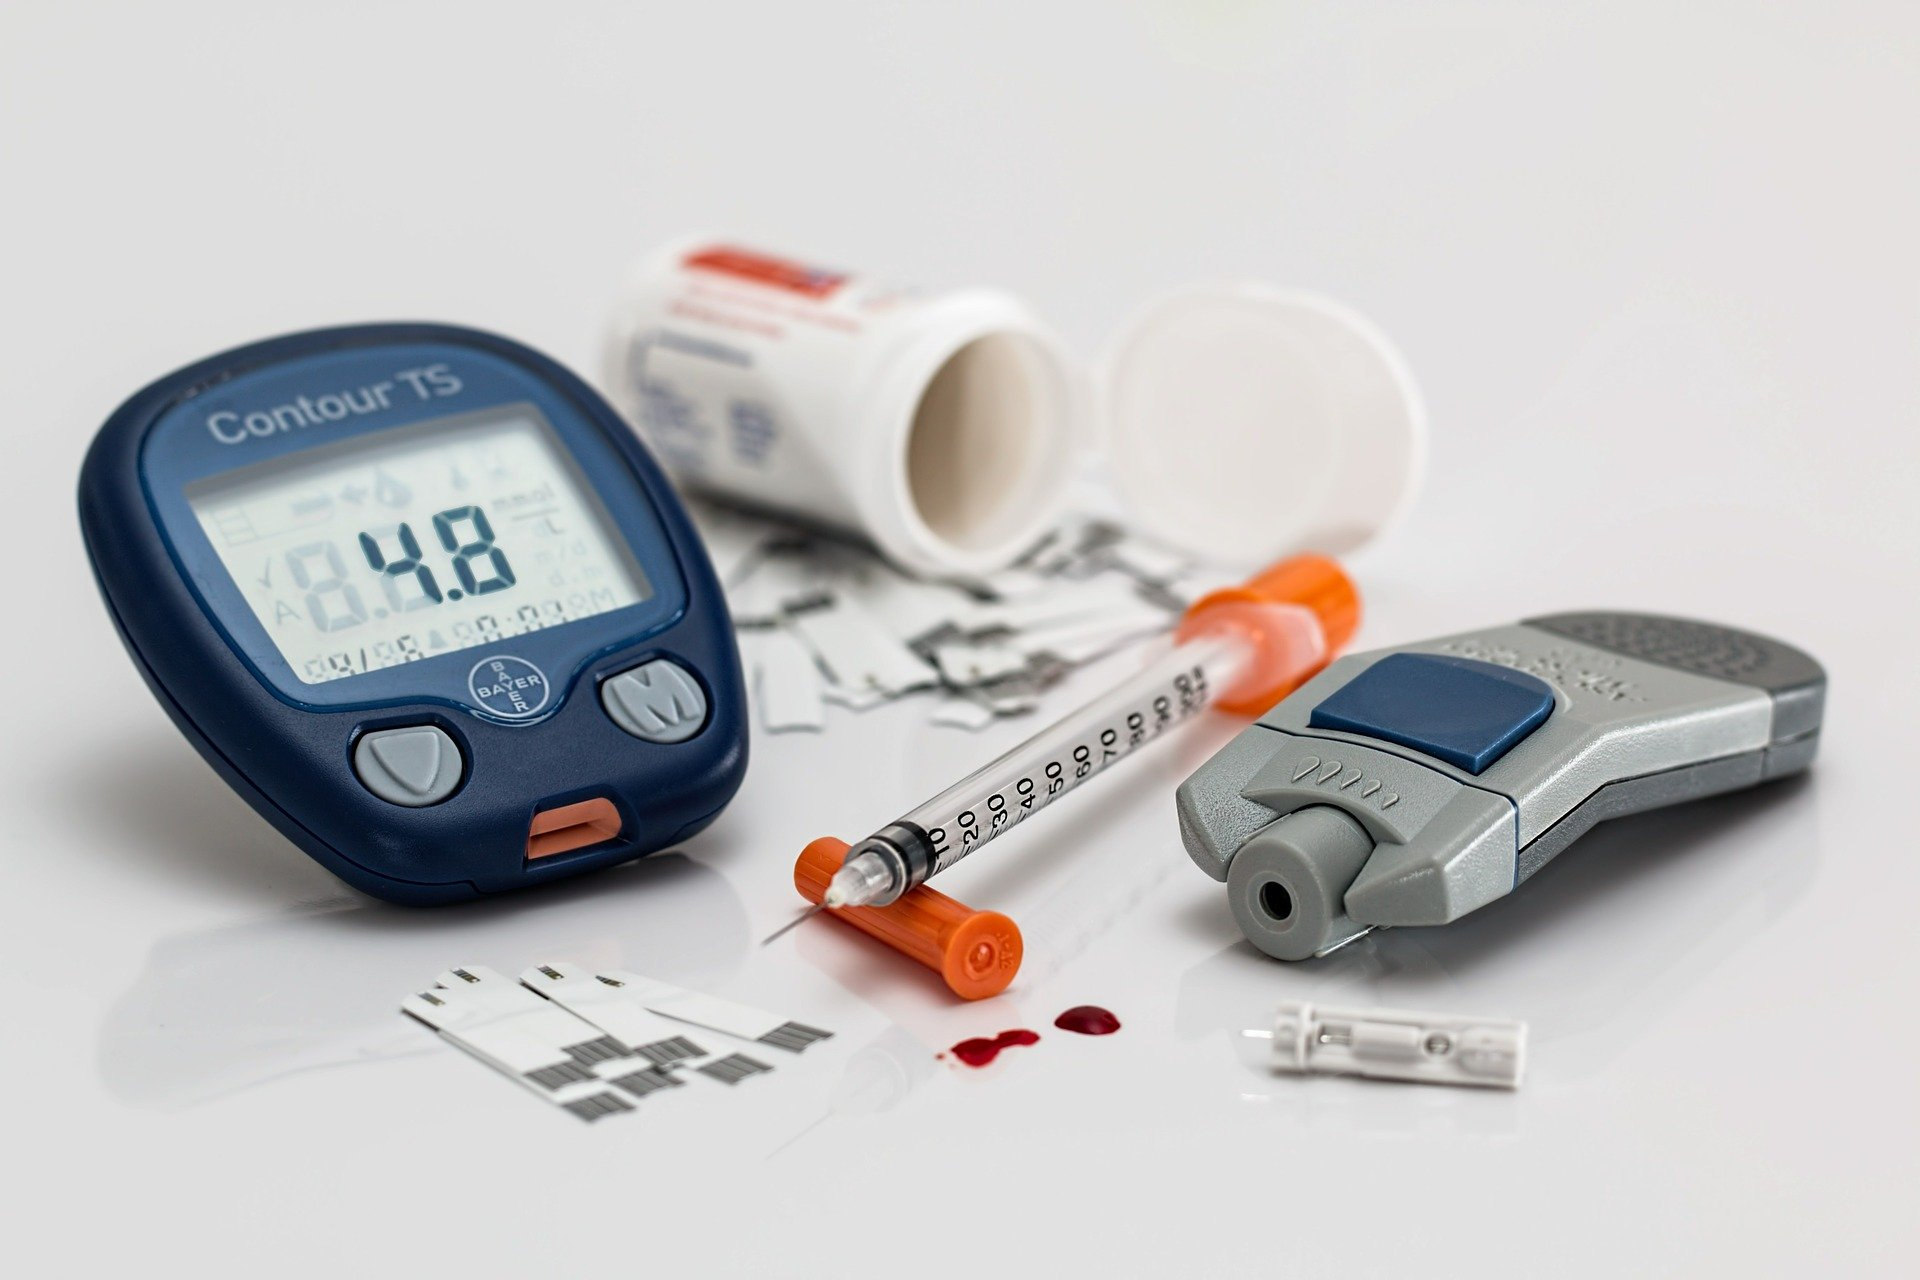

# 1. Introduction


## 1.1.  Problem Understanding 

> Diabetes is a chronic medical condition that is associated with elevated blood sugar levels in the body. Diabetes often leads to cardiovascular disease, stroke, kidney damage, and long-term damage to the extremities (that is, limbs and eyes).

> Diabetes can be divided into two subtypes: type 1 and type 2. Type 1 diabetes results from the body's inability to produce sufficient insulin. Type 1 diabetes is relatively rare compared to type 2 diabetes, and it only accounts for approximately 5% of diabetes. Unfortunately, the exact cause of type 1 diabetes is unknown and therefore, it is difficult to prevent the onset of type 1 diabetes.

> ype 2 diabetes results from the body's gradual resistance to insulin. Type 2 diabetes is the prevalent form of diabetes in the world, and it is caused by excessive body weight, irregular exercise, and a poor diet. Fortunately, the onset of type 2 diabetes can be prevented and reversed if diagnosed early.

> This project in One of the barriers for early detection and diagnosis of diabetes is that the early stages of diabetes are often non-symptomatic. People who are on the path to diabetes (also known as **prediabetes**) often do not know that they have diabetes until it is too late.

##### Solution : Apply machine learning model predict whether a patient will develop diabetes within the next five years.


## 1.2. Data 

> The dataset that we will be using for this project comes from the Pima Indians Diabetes dataset, as provided by the National Institute of Diabetes and Digestive and Kidney Diseases (and hosted by Kaggle).

    * Number of Instances: 768
    * Number of Attributes: 8 plus class
    * For Each Attribute: (all numeric-valued)
    * Missing Attributes Values : None

**Downloaded from :** https://www.kaggle.com/mathchi/diabetes-data-set

**Data Dictionary :**


| Features       | description               |
| :------------- | :----------: -----------: |
| Pregnancies    | Number of times pregnant       |
| Glucose        | Plasma glucose concentration a 2 hours in an oral glucose tolerance test        |
| BloodPressure  | Diastolic blood pressure (mm Hg)       |
| SkinThickness  | Triceps skin fold thickness (mm)        |
| Insulin        | 2-Hour serum insulin (mu U/ml)     |
| BMI            | Body mass index (weight in kg/(height in m)^2)       |
| DiabetesPedigreeFunction   | Diabetes pedigree function      |
|Age     | Age (years)         |
|Outcome     | Class variable (0 or 1)         |

## 1.3. Evaluation Metrics :
> We will evaluate the performance of the model using : Accuracy, Precision  and Recall.

> + **Accuracy**
    > The percent (ratio) of cases classified correctly

$$Accuracy = \frac{TP + TN}{TP + FP + TN + FN}$$
<p style="text-align: center; color:red"> (bad) 0 ≤ Accuracy ≤ 1 (good) </p> 

> + **Precision** => Accuracy of a predicted positive outcome 

$$Precision = \frac{TP}{TP + FP}$$
<p style="text-align: center; color:red"> (bad) 0 ≤ Precision ≤ 1 (good) </p> 

> + **Recall** => Measures model’s ability to predict a positive outcome 

$$Recall = \frac{TP}{TP + FN}$$
<p style="text-align: center; color:red"> (bad) 0 ≤ Recall ≤ 1 (good) </p> 

> + **F1 Score** => A combined metric, the harmonic mean of Precision and Recall. 

$$F1 Score = \frac{2*(Precision * Recall)}{Precision + Recall}$$
<p style="text-align: center; color:red"> (bad) 0 ≤ F1 Score ≤ 1 (good) </p>

+ Low when one or both of the Precision and Recall are low
+ High when both Precision and Recall are high



Read More : https://care.diabetesjournals.org/content/29/8/1866

## 1.4. Importing Packages

In [1]:
## basic package
import pandas as pd
import numpy as np

## Visualisation packagers
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

## pkg data preparation
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures


from math import sqrt

## Customized Function
from helpers import *

## Magic
%matplotlib inline
print("Libraries Imported ..")

Libraries Imported ..


## 1.5. Loading the data

In [2]:
raw_data = pd.read_csv("../data/diabetes.csv")
print("Dataset Loaded ... ")
print("####"*20)
print("Dataset Shape :",raw_data.shape)

Dataset Loaded ... 
################################################################################
Dataset Shape : (768, 9)


In [3]:
print("Column Names :",raw_data.columns)

Column Names : Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [4]:
df = raw_data.copy()

# 2. Exploratory Data Analysis (EDA)

## 2.1. Undertanding the Data

### 2.1.1. Firsts Rows

In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### 2.1.2. data information

In [6]:
df.info() #df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 2.1.3. Check Missing Values

In [7]:
pd.DataFrame(df.isnull().sum()).T

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,0,0,0,0,0,0,0,0


### 2.1.4. Descriptive Statistics

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


> he variables are on different scales. For example, the DiabetesPedigreeFunction variable ranges from 0 to ~2.5, while the Insulin variable ranges from 0 to ~800. This difference in scale can cause problems in training our neural network, as variables with larger scales tend to dominate variables with smaller scales.

### 2.1.5. Mean value of each value by categories

In [9]:
df.groupby('Outcome').mean().T

Outcome,0,1
Pregnancies,3.298000,4.865672
Glucose,109.980000,141.257463
BloodPressure,68.184000,70.824627
SkinThickness,19.664000,22.164179
Insulin,68.792000,100.335821
BMI,30.304200,35.142537
DiabetesPedigreeFunction,0.429734,0.550500
Age,31.190000,37.067164


> Variables mean value for outcome 0 are less than outcome 1.

## 2.2. Check data validation

Data Type, Data Range, Data Constraints, Data Consistency

**Is value in variables correspond to data type**

In [10]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

**Is data falls within an acceptable range of values defined for the field.**

> the Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, and BMI columns have a minimum value of 0. This doesn't quite make sense. The measurements for Glucose, BloodPressure, SkinThickness, Insulin, and BMI should never be 0. This is an indication that there are missing values in our dataset. The values were probably recorded as 0 due to certain issues during data collection. Perhaps the equipment was faulty, or the patient was unwilling to have their measurements taken.

In [11]:
for value in df.columns:
    print(f"number of rows missing {value}: {len(df.loc[df[value] == 0])}")

number of rows missing Pregnancies: 111
number of rows missing Glucose: 5
number of rows missing BloodPressure: 35
number of rows missing SkinThickness: 227
number of rows missing Insulin: 374
number of rows missing BMI: 11
number of rows missing DiabetesPedigreeFunction: 0
number of rows missing Age: 0
number of rows missing Outcome: 500


**Are values in the right range**

> How can someone Glucose of 0mg/dl ? , we think they made mistake in data input time by the way let have an ideas on glucose range ?

> Glucose : https://agamatrix.com/blog/normal-blood-sugar-level-chart/


| Features                             | ADA                        |AACE                      |
| :----------------:-----------------: | :------------------------: |-------------------------: |
|Before Meals (asting plasma glucose)  |	70-130mg/dL             |Less than 110 mg/dL       |
|2 Hours After a Meal                  | 	Less than 180 mg/dL     |Less than 140 mg/dL       |
|A1C (HbA1c)                           |	Less than 7.0%	        |Less than 6.5%            |
 
 
> Hence is incorect to have glucose values of 0mg/dl and we will raplace those by the mean of glucose value by outcome

> For Pregnancies column as 0 values in that column (that is, 0 previous pregnancies) are perfectly valid.

## 2.3. Variables Distribution 

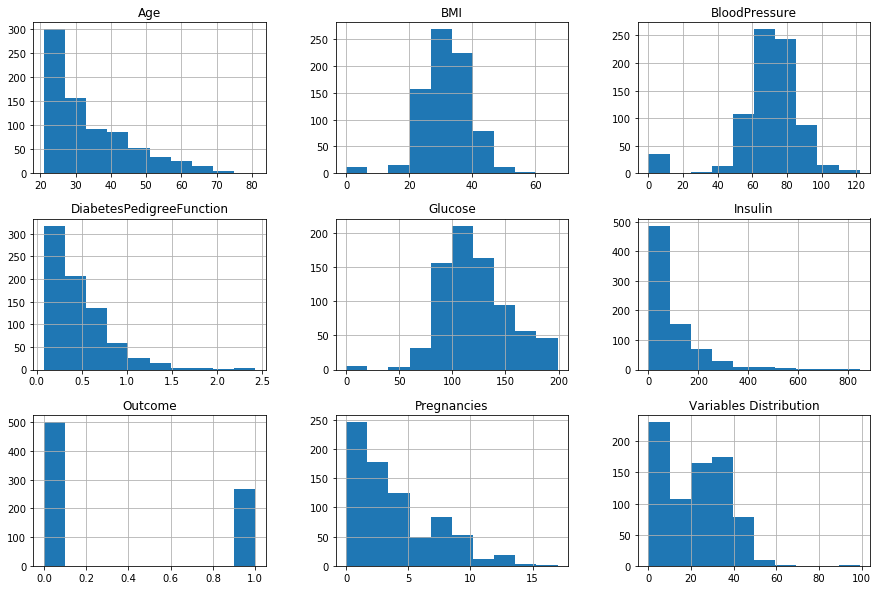

In [12]:
df.hist(figsize=(15, 10))
plt.plot()
plt.title('Variables Distribution')
plt.savefig('../figures/variables_distribution.png', bbox_inches='tight')

> for **Age**, we can see that most of the data was collected from young people, with the most common age group between 20-30 years old. 

>  the distribution for **BMI**, **BloodPressure**, and **Glucose concentration** is normally distributed (that is, a bell curve shape), which is what we we expect when we collect such statistics from a population. However, note that the tail of the Glucose concentration distribution shows some rather extreme values. It appears that there are people with plasma Glucose concentration that is almost 200. On the opposite end of the distribution, we can see that there are people with 0 values for BMI, BloodPressure, and Glucose. Logically, we know that it is not possible to have a 0 value for these measurements.

> the distribution for the number of previous Pregnancies, we can see some outliers as well. We can see that some patients had more than 15 previous pregnancies. While that may not be entirely surprising, we should keep such outliers in mind when we do our analysis, as it can skew our results.

> **we will deal with this situation in data preprocessing step.**

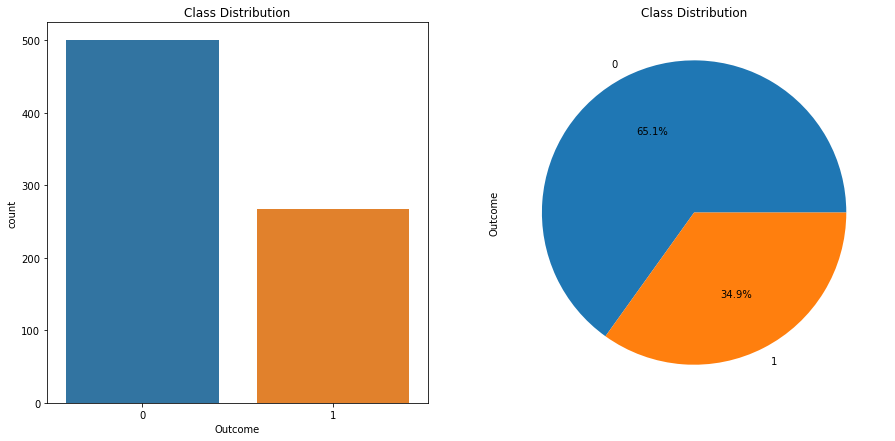

In [13]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Class Distribution')
sns.countplot(df['Outcome'])

plt.subplot(1,2,2)
df["Outcome"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Class Distribution')
plt.savefig('../figures/class_distribution.png', bbox_inches='tight')
plt.show()

> Dataset is unbalanced and often healthcare data are unbalaced with more positive cases and less negative cases

> The distribution of outcome shows that approximately 65% of the population belongs to class 0 (no diabetes), while the remaining 35% belongs to class 1 (diabetes).

> the distribution of the classes does not match those in the real world, as it is estimated by the World Health Organization (WHO) that only 8.5% of the world population suffers from diabetes.

## 2.4. Correlation

### 2.4.1. Correlation Matrix

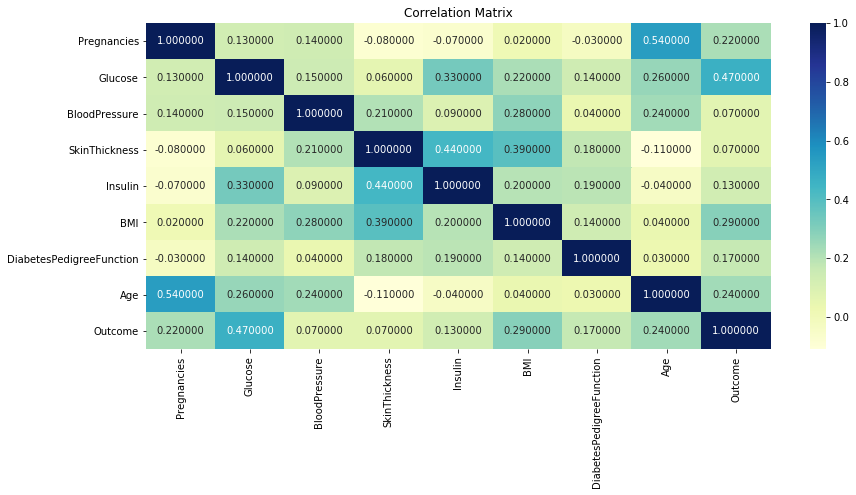

In [14]:
# compute the pair wise correlation for all columns  
correlation_matrix = df.corr().round(2)
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
plt.figure(figsize=(14,6))
sns.heatmap(data=correlation_matrix, annot=True, fmt="f",cmap="YlGnBu")
plt.title('Correlation Matrix')
plt.savefig('../figures/correlation_matrix.png', bbox_inches='tight')

### 2.4.2. Correlation (Visualized with Scatter plot)

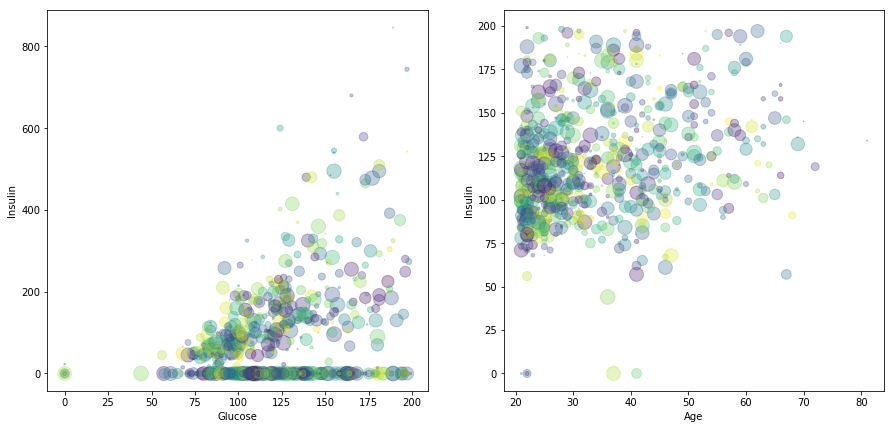

In [15]:
N=df.shape[0]
colors = np.random.rand(N)
area = (15 * np.random.rand(N))**2  # 0 to 15 point radii

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.scatter(df['Glucose'], df['Insulin'], s=area, c=colors, alpha=0.3)
plt.xlabel("Glucose")
plt.ylabel("Insulin")

plt.subplot(1,2,2)
plt.scatter(df['Age'], df['Glucose'], s=area, c=colors, alpha=0.3)
plt.xlabel("Age")
plt.ylabel("Insulin")
plt.savefig('../figures/scatter_plot.png', bbox_inches='tight')
plt.show()

### 2.4.3. Features variable distribution with each target class

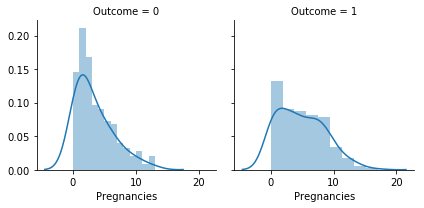

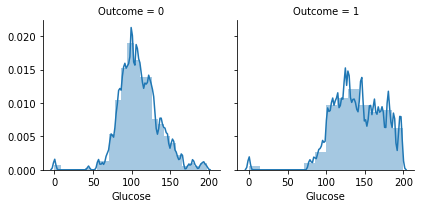

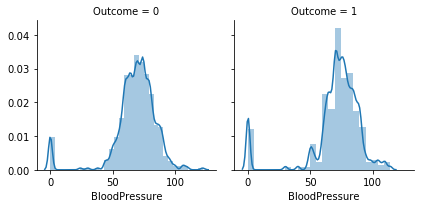

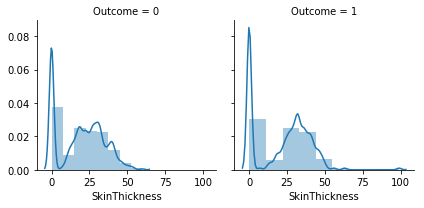

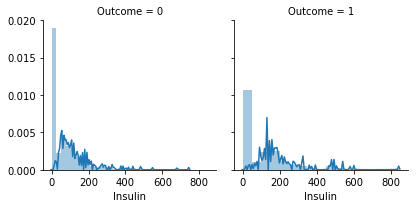

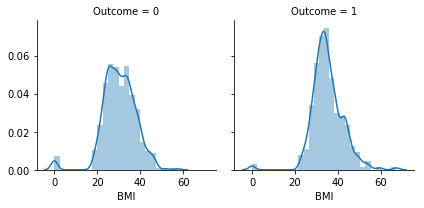

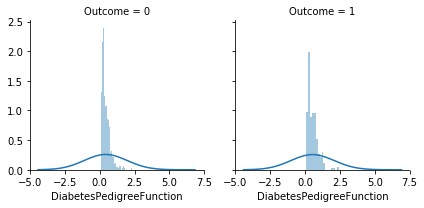

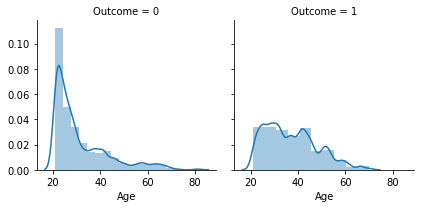

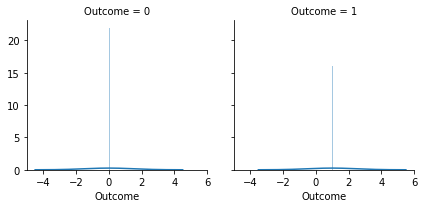

In [16]:
col_names = df.columns
for col in col_names:
    b = sns.FacetGrid(df,col="Outcome") #hue or col
    b.map(sns.distplot,col, kde_kws={'bw': 1.5}).add_legend

>  If we look at the plot for the Glucose variable, we can see that among the non-diabetics (solid line), the curve has a normal distribution centered around the value 100. This tells us that among non-diabetics, most people have a blood glucose value of 100 mg/dL. On the other hand, if we look at the Diabetics (dashed line), the curve is wider and is centered around a value of 150. This tells us that diabetics tends to have a wider range of blood glucose value, and the average blood glucose value is around 150 mg/dL. Therefore, there is a significant difference in blood glucose values for diabetes vs non-diabetics. A similar analysis can also be made for the variable BMI and Age. In other words, the Glucose, BMI, and Age variables are strong predictors for diabetes. People with diabetes tend to have higher blood glucose level, higher BMI, and are older.

> On the other hand, we can see that for variables such as BloodPressure and SkinThickness, there is no significant difference in the distribution between diabetics and non-diabetics. The two groups of people tend to have similar blood pressure and skin thickness values. Therefore, BloodPressure and SkinThickness are poorer predictors for diabetes.

## 2.5. Outliers Checking

### 2.5.1. Compute Lower and upper limit values

In [17]:
#outlier remove
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR =  Q3-Q1
lower, upper = (Q1 - 1.5 * IQR), (Q3 + 1.5 * IQR)
 
pd.DataFrame({"First Quantile":Q1, "Third Quantile":Q3, "Inter-Quantile Range":IQR, "Lower":lower, "Upper":upper})

,First Quantile,Third Quantile,Inter-Quantile Range,Lower,Upper
Pregnancies,1.00000,6.00000,5.0000,-6.500,13.500
Glucose,99.00000,140.25000,41.2500,37.125,202.125
BloodPressure,62.00000,80.00000,18.0000,35.000,107.000
SkinThickness,0.00000,32.00000,32.0000,-48.000,80.000
Insulin,0.00000,127.25000,127.2500,-190.875,318.125
BMI,27.30000,36.60000,9.3000,13.350,50.550
DiabetesPedigreeFunction,0.24375,0.62625,0.3825,-0.330,1.200
Age,24.00000,41.00000,17.0000,-1.500,66.500
Outcome,0.00000,1.00000,1.0000,-1.500,2.500


### 2.5.2. Box plot

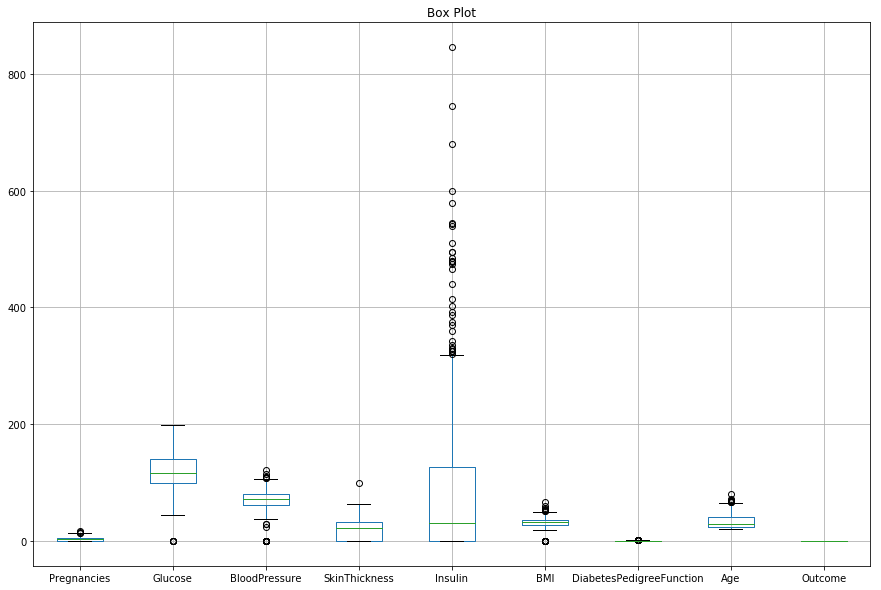

In [18]:
#Horizontal default boxplot chart
df.boxplot(vert=True,figsize=(15, 10))
plt.title('Box Plot')
plt.savefig('../figures/box_plot.png', bbox_inches='tight')

In [19]:
conda install scikit-learn=0.23.2

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


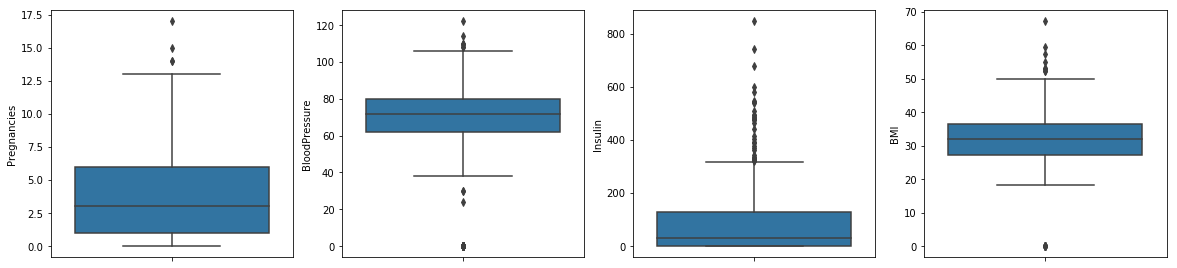

In [20]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.boxplot(y=df['Pregnancies'])

plt.subplot(2,4,2)
sns.boxplot(y=df['BloodPressure'])
            
plt.subplot(2,4,3)
sns.boxplot(y=df['Insulin'])

plt.subplot(2,4,4)
sns.boxplot(y=df['BMI'])

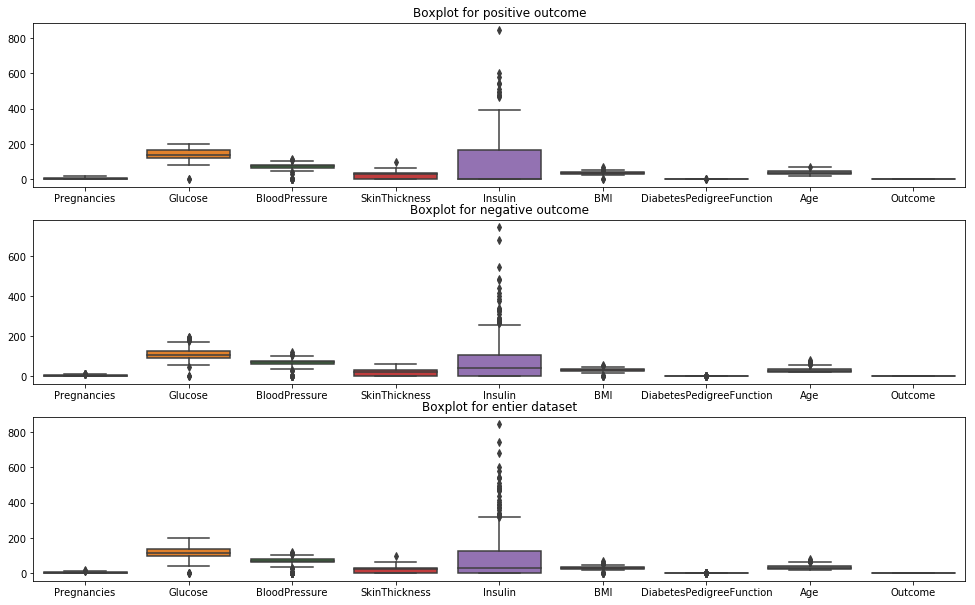

In [21]:
positive=df.loc[df['Outcome']==1]
negative=df.loc[df['Outcome']==0]

f, axes = plt.subplots(3, 1)
f.set_size_inches(16.7, 10.27)
sns.boxplot(data=positive , ax=axes[0]).set_title('Boxplot for positive outcome')
sns.boxplot(data=negative , ax=axes[1]).set_title('Boxplot for negative outcome')
sns.boxplot(data=df , ax=axes[2]).set_title('Boxplot for entier dataset')
plt.savefig('../figures/boxplot2.png', bbox_inches='tight')

Boxplot for each feature by outcome after remove outlier


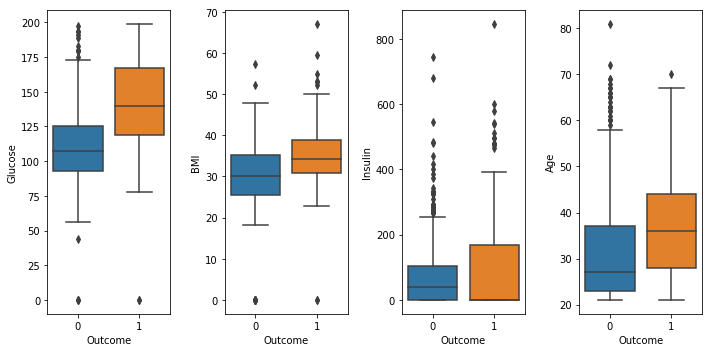

In [22]:
print('Boxplot for each feature by outcome after remove outlier')
plt.rcParams['figure.figsize'] = [10,5]
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
sns.boxplot('Outcome', y='Glucose', data=df, ax=ax1)
sns.boxplot('Outcome', y='BMI', data=df, ax=ax2)
sns.boxplot('Outcome', y='Insulin', data=df, ax=ax3)
sns.boxplot('Outcome', y='Age', data=df, ax=ax4)

f.tight_layout()

# 3. Data Cleaning

##### First, let's replace the 0 values in the Glucose, BloodPressure, SkinThickness, Insulin, and BMI columns with NaN.

In [23]:
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

Now let's confirm that the Glucose, BloodPressure, SkinThickness, Insulin, and BMI columns no longer contain 0 values:

In [24]:
for value in col_names:
    print(f"number of rows missing {value}: {len(df.loc[df[value] == 0])}")

number of rows missing Pregnancies: 111
number of rows missing Glucose: 0
number of rows missing BloodPressure: 0
number of rows missing SkinThickness: 0
number of rows missing Insulin: 0
number of rows missing BMI: 0
number of rows missing DiabetesPedigreeFunction: 0
number of rows missing Age: 0
number of rows missing Outcome: 500


> Note that we did not modify the Pregnancies column as 0 values in that column (that is, 0 previous pregnancies) are perfectly valid.

##### Now, let's replace the NaN values with the mean of the non-missing values. We can do this using the handy fillna() function in pandas:

In [25]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


In [27]:
f_filled_0_by_mean = df.copy()
df.to_csv('../data/clean_data.csv', index=False)

# 4. Data Preparation

## 4.1. Data standardization (numerical variable)

+ The goal of data standardization is to transform the numeric variables so that each variable has zero mean and unit variance.

+ Standardization of variables as a preprocessing step is a requirement for many machine learning algorithms.

+ Another positive effect of data standardization is that it shrinks the magnitude of the variables, transforming them to a scale that is more proportional.
+ Lack of scaling causing the neural network to inadvertently place more emphasis on the variable with a greater scale.

In [28]:
# Select numerical variable
import numpy as np
df_num = df.select_dtypes(include=[np.number])
num_cols = df_num.columns.values
print(num_cols)

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']


In [29]:
from sklearn import preprocessing

df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled['Outcome'] = df['Outcome']
df = df_scaled

In [30]:
df.describe().loc[['mean', 'std','max'],].round(2).abs()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.35
std,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.48
max,3.91,2.54,4.1,7.95,8.13,5.04,5.88,4.06,1.00


## 4.2. One Hot Encoding (non numeric columns)

In [31]:
# select non cnumeric columns columns
non_numeric = df.select_dtypes(exclude=[np.number])
no_num_cols = non_numeric.columns.values
print(no_num_cols)

[]


In [32]:
df.to_csv('../data/scaled_data.csv', index=False)

### 4.3. Splitting the data into training, testing, and validation sets

In [33]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
pd.DataFrame({"Training": [X_train.shape, y_train.shape], "Validation":[X_val.shape, y_val.shape], 
              "Testing":[X_test.shape, y_test.shape]}, index=['Features', 'Target'])

,Training,Validation,Testing
Features,"(491, 8)","(123, 8)","(154, 8)"
Target,"(491,)","(123,)","(154,)"


## Data Preprocessing Summary

**After preprocessing raw data we get :**
* cleaned_data
> fixed missing, non consistence and validity problems
* Scaled_data 
> where each value have std of 1 and mean of 0, scaled is important for a good performance of some ML algorithm)

**Can Do More:**
* Remove outlier from cleaned_data and generate dataset with outlier and dataset without outlier

## For machine Learning & Deep learning Training

After data preprocessing we are not ready to train our models, training process have been done in the following notebooks :

* 2_ML_model.ipynb
* 3_DL_model.ipynb

**NB :** We will also train our model with some python libraries that exige less code (ex : pycaret ...)

#####################################################################################################

#####################################################################################################

#####################################################################################################

* [creating-the-whole-machine-learning-pipeline-with-pycaret](https://towardsdatascience.com/creating-the-whole-machine-learning-pipeline-with-pycaret-db39a3006840)

* https://www.neuraldesigner.com/

* https://www.mockaroo.com/

* https://www.navigatingradiology.com/

* https://en.wikipedia.org/wiki/Disease

* https://subscription.packtpub.com/video/business/9781788991940/71819/72810/the-course-overview

* https://www.nhsinform.scot/

* https://subscription.packtpub.com/book/big-data-and-business-intelligence/9781789536591/1

* https://wordpress.com/home/kiesediangebenireagan.wordpress.com

* https://www.aminer.cn/

* https://codecap.org/category/python-programming/

* https://machinelearningmastery.com/calculate-feature-importance-with-python/

* https://medium.com/machine-learning-101/k-nearest-neighbors-classifier-1c1ff404d265
* [Diabetes-Detection  with c++](https://github.com/Amit3200/Diabetes-Detection )
* [capstone diabetes-detection Very import for report template](https://github.com/jodiealaine/diabetes-detection/blob/master/capstone_report.pdf)